# SNA Project First Round
# Data Set - Wikipedia Talk network

This is a road network of Texas. Intersections and endpoints are represented by nodes, and the roads connecting these intersections or endpoints are represented by undirected edges.

In [50]:
import networkx as nx
G=nx.read_edgelist('7.txt',nodetype=int,create_using=nx.Graph())
#print (nx.number_of_nodes(G))
#print (nx.number_of_edges(G))
print (nx.info(G))
print(nx.is_directed(G))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 7
Average degree:   2.8000
False


##### DataSet Description
Type : Graph" means that it is a simple and undirected graph.  It has  509 nodes and 579 edges . The average degree is 2.3667. It has 284 edges.

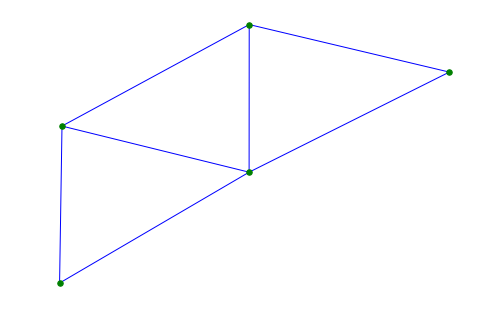

[(1, 3), (2, 4), (3, 2), (4, 3), (5, 2)]


In [51]:
import matplotlib.pyplot as plt

nx.draw(G, pos=None, node_color='g', edge_color='b',node_size=30)
plt.show()
print(nx.degree(G))

### Degree Distribution

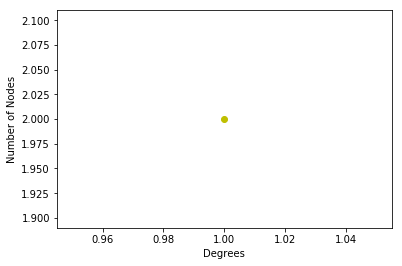

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


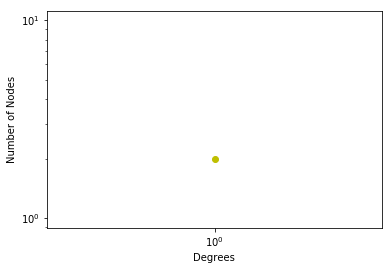

In [35]:


d=dict()
for x,y in nx.degree(G):
    if y not in d:
        d[y]=1
    else:
        d[y]+=1
#for x in d:
    #print(x,d[x])
plt.plot(d.keys(),d.values(),'yo-')
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
#print(list(set(all_degrees)))
#print (nx.degree(G))
plt.show()
plt.loglog(d.keys(),d.values(),'yo-')
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.show()


### Power Law

### Density Calculation


In [36]:
print (nx.density(G))

1.0


### Local Clustering Coeffecient

In [37]:
for i in (nx.clustering(G).items()):
    print i
    
print nx.average_clustering(G)

def answer_one():
    
    # Your Code Here
    G = nx.read_edgelist('data.txt', nodetype=str, data=[('FromNodeId', int)], create_using=nx.MultiDiGraph())
   # G=nx.Graph('roadNet-TX.txt')
   # nx.draw(G)
    nx.draw(G, pos=nx.circular_layout(G), nodecolor='g', edge_color='b')

    plt.show()
    return G # Your Answer Here
def answer_two():
        
    # Your Code Here
    G = answer_one()
    num_employees = nx.number_of_nodes(G)
    num_emails = nx.number_of_edges(G)
    plt.show();
    return (num_employees, num_emails) # Your Answer Here

(1, 0)
(2, 0)
0.0


### Global Clustering Coeffecient

In [38]:
print(nx.transitivity(G))
def answer_three():
        
    # Your Code Here
    G = answer_one()
    b1 = nx.is_strongly_connected(G)
    b2 = nx.is_weakly_connected(G)
    return (b1, b2) # Your Answer Here

0


### Reciprocity

In [39]:
print nx.reciprocity(G)
def answer_four():
        
    # Your Code Here
    G = answer_one()
    G_list = list(nx.weakly_connected_components(G))
    num = 0
    for i in range(len(G_list)):
        if len(G_list[i])>num:
            num = len(G_list[i])
    return num # Your Answer Here

0.0


## Centrality Measures

### 1. Degree Cenrality

In [24]:
#print nx.degree_centrality(G)

print (max(nx.out_degree_centrality(G),key=(nx.out_degree_centrality(G)).get))

def answer_five():
    
        
    # Your Code Here
    G = answer_one()
    G_list = list(nx.strongly_connected_components(G))
    num = 0
    for i in range(len(G_list)):
        if len(G_list[i])>num:
            num = len(G_list[i])    
    return num # Your Answer Here

219


### Question 6

Using the NetworkX function strongly_connected_component_subgraphs, find the subgraph of nodes in a largest strongly connected component. 
Call this graph G_sc.

*This function should return a networkx MultiDiGraph named G_sc.*

In [25]:
import numpy as np
#print (nx.eigenvector_centrality_numpy(G))
print (max(nx.eigenvector_centrality_numpy(G),key=(nx.eigenvector_centrality_numpy(G)).get))
#print(['%s %0.2f'%(node,centrality[node]) for node in centrality])

909


### Question 7

What is the average distance between nodes in G_sc?

*This function should return a float.*

In [26]:
#print (nx.betweenness_centrality(G))
print (max(nx.betweenness_centrality(G),key=(nx.betweenness_centrality(G)).get))
def answer_seven():
        
    # Your Code Here
    G_sc = answer_six()
    return nx.average_shortest_path_length(G_sc) # Your Answer Here

436


### Question 8

What is the largest possible distance between two employees in G_sc?

*This function should return an int.*

In [16]:
from collections import Counter
from heapq import nlargest
#print nx.closeness_centrality(G)
print (max(nx.closeness_centrality(G),key=(nx.closeness_centrality(G).get)))
three_largest = nlargest(5, nx.closeness_centrality(G), key=nx.closeness_centrality(G).get)
print three_largest
#print  (dict(sorted(nx.closeness_centrality(G).iteritems(), reverse=True)[:5]))
#dict(Counter(nx.closeness_centrality(G).most_common(5)))
def answer_eight():
        
    # Your Code Here
    G_sc = answer_six()
    return nx.diameter(G_sc) # Your Answer Here

975014
[975014, 270343, 1245192, 1228825, 352284]


### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [97]:
def answer_nine():
       
    # Your Code Here
    G_sc = answer_six()
    return set(nx.periphery(G_sc)) # Your Answer Here

### Question 10

What is the set of node(s) in G_sc with eccentricity equal to the radius?

*This function should return a set of the node(s).*

In [98]:
def answer_ten():
        
    # Your Code Here
    G_sc = answer_six()
    return set(nx.center(G_sc)) # Your Answer Here

### Question 11

Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the diameter of G_sc?

How many nodes are connected to this node?


*This function should return a tuple (name of node, number of satisfied connected nodes).*

In [99]:
def answer_eleven():
        
    # Your Code Here
    G_sc = answer_six()
    temp = None
    temp_num = 0
    dia = nx.diameter(G_sc)
    for x in nx.periphery(G_sc):
        ct = 0
        for y in G_sc.nodes():
            if nx.shortest_path_length(G_sc, x, y)==dia:
                ct+=1
        if(ct>temp_num):
            temp_num = ct
            temp = x
    return (temp, temp_num) # Your Answer Here

### Question 12

Suppose you want to prevent communication from flowing to the node that you found in the previous question from any node in the center of G_sc, what is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or the center nodes)? 

*This function should return an integer.*

In [100]:
def answer_twelve():
        
    # Your Code Here
    G_sc = answer_six()
    node = list(answer_eleven())[0]
    center = answer_ten()
    remove = []
    for x in center:
        remove += (list(nx.minimum_node_cut(G_sc, x, node)))
    return len(remove) # Your Answer Here

### Question 13

Construct an undirected graph G_un using G_sc (you can ignore the attributes).

*This function should return a networkx Graph.*

In [101]:
def answer_thirteen():
        
    # Your Code Here
    G_sc = answer_six()
    G_un = nx.Graph(G_sc.to_undirected())
    return G_un # Your Answer Here

### Question 14

What is the transitivity and average clustering coefficient of graph G_un?

*This function should return a tuple (transitivity, avg clustering).*

In [102]:
def answer_fourteen():
        
    # Your Code Here
    G_un = answer_thirteen()
    transitivity = nx.transitivity(G_un)
    cluster_coef = nx.average_clustering(G_un)
    return (transitivity, cluster_coef) # Your Answer Here

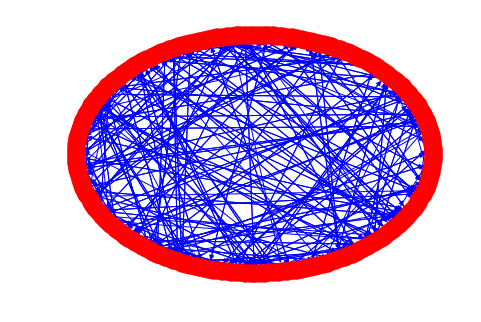

In [103]:
answer_one()

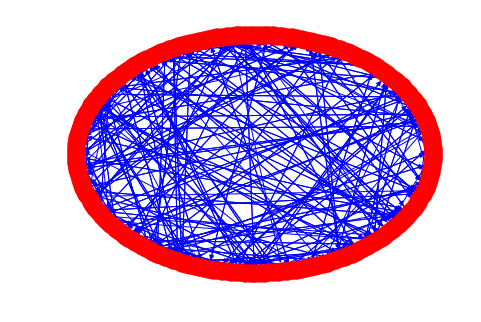

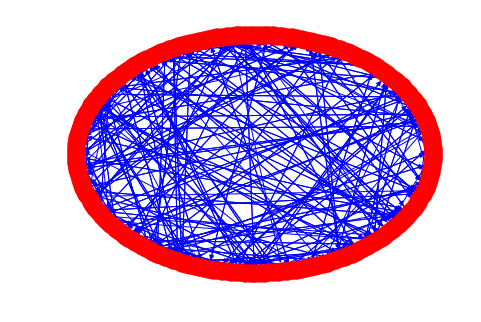

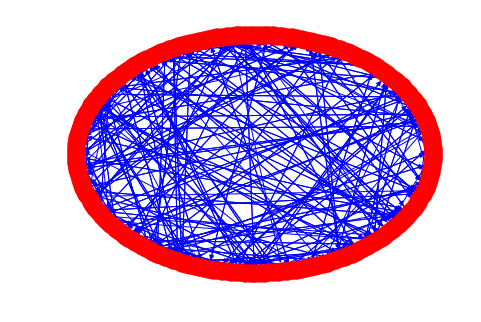

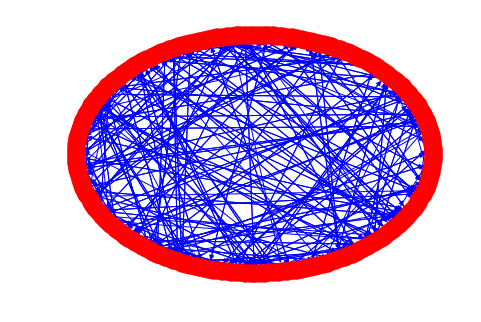

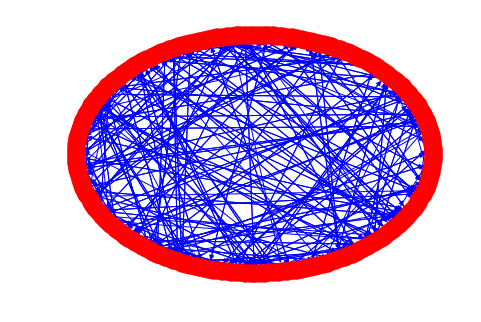

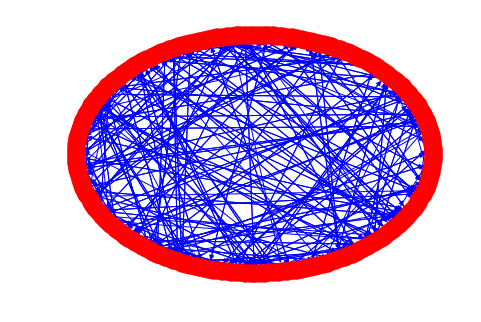

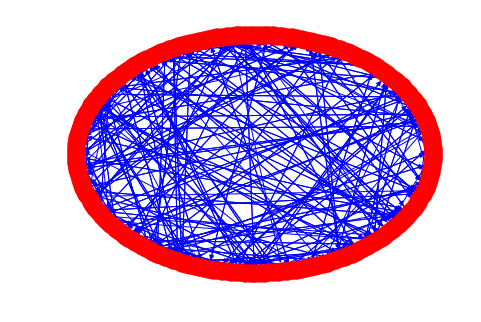

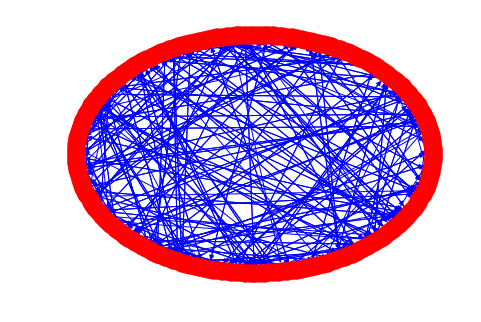

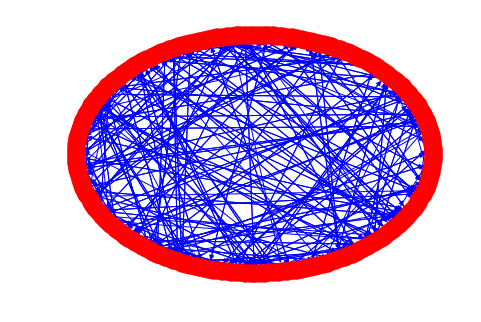

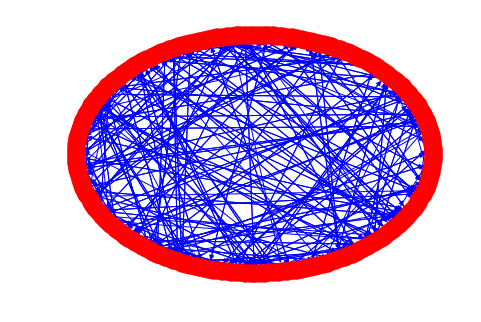

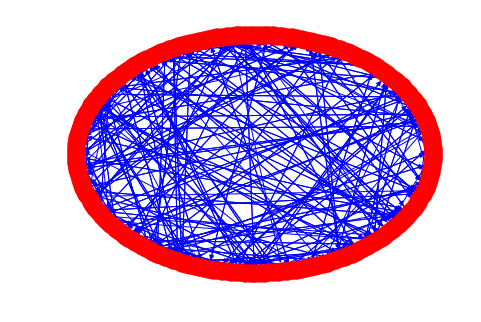

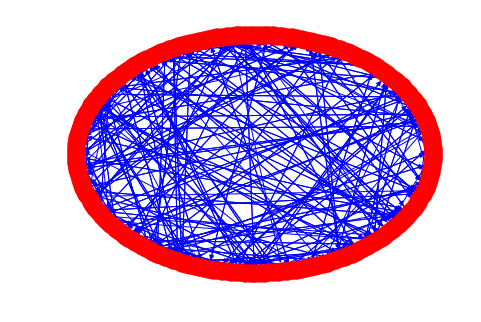

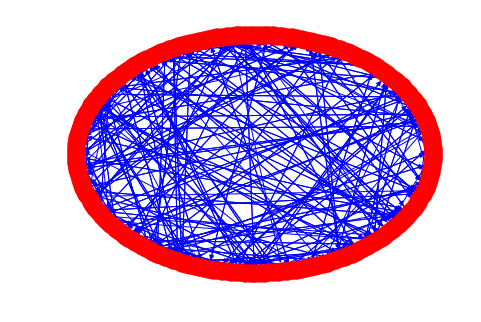

3

In [104]:

answer_two()
answer_three()
answer_four()
answer_five()
answer_six()
answer_seven()
answer_eight()
answer_nine()
answer_ten()
answer_eleven()
answer_twelve()

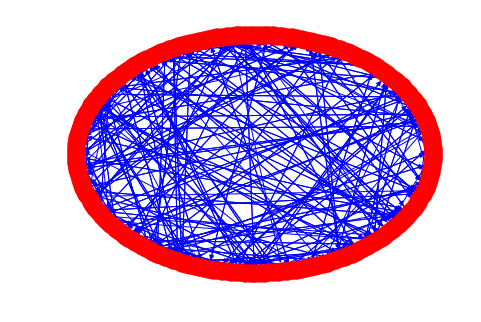

In [105]:
answer_thirteen()